# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Willy Himawan
- **Email:** m320b4ky4490@bangkit.academy
- **ID Dicoding:** Willy Himawan

## Menentukan Pertanyaan Bisnis


- Bagaimana tren penjualan perusahaan selama beberapa tahun terakhir?
- Di musim apa penyewaan sepeda paling tinggi terjadi?
- Berapa banyak orang yang lebih memilih menjadi pelanggan terdaftar dibandingkan dengan pelanggan biasa?
- Pada jam berapakah penyewaan sepeda mencapai puncaknya dan kapan yang paling sedikit?
- Pada setiap tahunnya, di bulan apa penyewaan tertinggi terjadi?

## Import Semua Packages/Library yang Digunakan

In [69]:
# libraries requirements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Data Wrangling

### Gathering Data

In [70]:
# import day csv
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [71]:
# import hour csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat pola penyewaan sepeda berdasarkan hari dan jam. Contohnya kita bisa melihat apakah ada perbedaan jumlah penyewaan di hari kerja dan akhir pekan, dan pada jam berapa di hari tersebut penyewaan paling tinggi. Data di ```hour.csv``` memberikan gambaran detail untuk setiap jamnya, sedangkan ```day.csv``` memberikan gambaran agregat harian.
- Ada beberapa faktor yang mempengaruhi penyewaan seperti kolom ```weathersit```, ```temp```, ```atemp```, ```hum```, dan ```windspeed```. Kolom-kolom tersebut memungkinkan kita untuk menganalisis bagaimana faktor cuaca dapat mempengaruhi penyewaan sepeda ini ```cnt```. Contohnya seperti bagaimana cuaca buruk (```weathersit 2-3```) berdampak signifikan pada penurunan jumlah penyewaan (baik dalam hari maupun jam).

### Assessing Data

In [72]:
# menilai apakah data ini valid baik dalam tipe data ataupun duplicate/missing value

# cek tipe data
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [73]:
# cek duplikat values
print("Total duplikat dalam tabel day: ", day_df.duplicated().sum())
print("Total duplikat dalam tabel hour: ", hour_df.duplicated().sum())

Total duplikat dalam tabel day:  0
Total duplikat dalam tabel hour:  0


In [74]:
# cek null values
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [75]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [76]:
# cek parameter statistik day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [77]:
# cek parameter statistik hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat beberapa informasi yang kita dapatkan dari hasil info(), duplicated(), dan isna(). Dapat kita lihat bahwa tidak ada data yang terduplikasi dan juga missing dari kedua dataset, yang artinya tidak ada data yang redundant berdasarkan hasil pemeriksaan.
- Ada beberapa tipe data yang kurang cocok seperti ```dteday``` (seharusnya datetime, bukan object) dan yang seharusnya category namun pengaplikasiannya menggunakan int. Ini nanti akan diperbaiki di seksi cleaning data.
- Pada data ```day.csv``` dan ```hour.csv```, kolom numerik seperti ```temp```, ```hum```, dan ```windspeed``` memiliki rentang nilai yang sudah dinormalisasi (karena rentang nilainya logis).
- Kolom ```casual```, ```registered```, dan ```cnt``` memiliki variasi yang cukup besar, menunjukkan adanya fluktuasi jumlah penyewaan sepeda baik untuk pengguna kasual maupun pengguna terdaftar. Misalnya, pada dataset day.csv, jumlah penyewaan terendah (cnt) adalah 22, sementara tertinggi mencapai 8714, menunjukkan adanya variasi yang signifikan dalam jumlah penyewaan dari hari ke hari.
- Dari ```day.csv```, terlihat bahwa rata-rata jumlah penyewaan oleh pengguna terdaftar (```registered```) (3656.17) jauh lebih tinggi dibandingkan pengguna kasual (```casual```) (848.18). Ini menunjukkan bahwa pelanggan terdaftar mendominasi penggunaan layanan penyewaan sepeda. Hal ini didukung oleh nilai rata-rata dari ```registered``` (153.79) yang dimana jauh lebih tinggi daripada ```casual``` (35.68), menunjukkan bahwa pengguna terdaftar lebih konsisten dalam menggunakan layanan sepeda ini.
- Di kolom ```cnt``` pada hour.csv, nilai maksimum mencapai 977, sementara nilai median hanya 142. Hal ini menunjukkan adanya kemungkinan outlier pada data jumlah penyewaan, yang bisa jadi terkait dengan waktu tertentu seperti event khusus atau hari libur.
- Beberapa poin lainnya seperti, ```workingday```(0, 1 = kerja dan libur), penyewaan tertinggi di jam tertentu, dan faktor cuaca merupakan faktor lain yang bisa diperhatikan lebih lanjut untuk menjawab pertanyaan yang telah saya buat sebelumnya.

### Cleaning Data

#### Fix Tipe Data

In [78]:
# sesuai hasil analisis sebelumnya, kita ganti tipe data yang kurang sesuai.

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

#### DROP, MISSING, DUPLICATE, RENAME

MENGATASI MISSING DAN DUPLICATE VALUE

In [79]:
# meskipun tidak ada missing dan duplicate values di analisis sebelumnya
# alangkah baiknya untuk tetap drop missing dan duplicate data agar lebih aman

day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

day_df = day_df.dropna()
hour_df = hour_df.dropna()

#### Mengkonversi dan Merapikan Data (Rename)

In [80]:
# rename kolom agar lebih mudah untuk dibaca untuk dataset day dan hour

day_df.rename(columns={'yr':'year','mnth':'month', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

# konversi key data yang disingkat menjadi key yang mudah dimengerti
# mengonversi nilai 'season' menjadi nama musim agar mudah dimengerti
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

# mengonversi nilai 'month' agar menjadi singkatan bulan
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
day_df['month'] = day_df['month'].map(month_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)

# mengonversi nilai 'weather_situation' menjadi deskripsi cuaca
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'}
day_df['weather_situation'] = day_df['weather_situation'].map(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)

# membuat kolom 'day_category' agar index hari dapat digunakan untuk perhitungan lebih lanjut
hour_df["day_category"] = hour_df["weekday"]
day_df["day_category"] = day_df["weekday"]

# mengonversi nilai 'one_of_week' menjadi nama hari dalam minggu
week_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].map(week_mapping)
hour_df['weekday'] = hour_df['weekday'].map(week_mapping)

# mengonversi nilai 'year' menjadi tahun sebenarnya
year_mapping = {0: '2011', 1: '2012'}
day_df['year'] = day_df['year'].map(year_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)

# memperjelas ketegori hari dengan mengubah 0 dan 1 pada workingday menjadi weekend dan weekdays
days_category = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def convert_to_days(one_of_week, workingday):
    if one_of_week in ["Saturday", "Sunday"]: # cek apakah weekend atau weekdays
        return "Weekend"
    else:
        return "Weekdays"

hour_df["workingday"] = hour_df.apply(lambda row: convert_to_days(row["weekday"], row["workingday"]), axis=1)
day_df["workingday"] = day_df.apply(lambda row: convert_to_days(row["weekday"], row["workingday"]), axis=1)

# menghitung kelembaban dalam bentuk persentase (%)
day_df['humidity'] *= 100
hour_df['humidity'] *= 100


#### Menghapus Outliers

In [81]:
# menghilangkan outlier dengan menggunakan teknik IQR

Q1 = hour_df['count_cr'].quantile(0.25)
Q3 = hour_df['count_cr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['count_cr'] >= lower_bound) & (hour_df['count_cr'] <= upper_bound)]

#### Klasifikasi Humidity

In [82]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Sangat kering"
    elif humidity >= 45 and humidity < 65:
        return "Normal"
    else:
        return "Sangat Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

<ipython-input-82-999663dc2cca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)


In [83]:
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_category,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Weekend,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,6,Sangat Lembab
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Weekend,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,0,Sangat Lembab
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Weekdays,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,1,Sangat kering
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Weekdays,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562,2,Normal
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Weekdays,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600,3,Sangat kering


**Insight:**
- Fix tipe data untuk ```dteday``` dari object menjadi datetime. Mengubah tipe data ```season```, ```mnth```, ```workingday```, ```holiday```, ```weekday```, dan ```weathersit```
- Drop duplicated data dan mengatasi missing values.
- Rename kolom yang disingkat agar lebih mudah untuk dibaca dan dimengerti.
- Merapikan data dengan mengonversi value data menggunakan mapping. Tujuannya agar data lebih mudah dibaca.
- Menghapus outliers. Kolom ```casual```, ```registered```, dan ```cnt``` memiliki rentang yang cukup besar, yang bisa menunjukkan adanya outlier. Dengan menggunakan teknik IQR, kita bisa mendeteksi dan menghapus outlier tersebut.
- Mendapatkan label untuk masing-masing humidity agar lebih mudah diklasifikasikan (Sangat lembab, Normal, Sangat kering)

## Exploratory Data Analysis (EDA)

### Explore Data day.csv (day_df)

In [84]:
# analisis data statistik data day
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_category,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731
unique,NaN,NaN,4,2,12,2.0,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Weekdays,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Normal
freq,NaN,NaN,188,366,62,710.0,105,521,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


#### Pertanyaan 1

In [85]:
# Bagaimana tren penjualan perusahaan selama beberapa tahun terakhir?

# mengelompokkan data berdasarkan tahun dan menghitung total penyewaan sepeda
sales_trend = day_df.groupby('year')['count_cr'].sum()

# menampilkan hasilnya
print(sales_trend)

year
2011    1243103
2012    2049576
Name: count_cr, dtype: int64


#### Pertanyaan 2

In [86]:
# Di musim apa penyewaan sepeda paling tinggi terjadi?

# kita groupkan berdasarkan musin (season)
day_df.groupby(by="season", observed=False).count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [87]:
# mengelompokkan data berdasarkan musim dan menghitung rata-rata penyewaan sepeda
average_rental_by_season = day_df.groupby('season', observed=False)['count_cr'].mean()

# menemukan musim dengan penyewaan tertinggi
peak_season = average_rental_by_season.idxmax()

# menampilkan hasilnya
print(f"Penyewaan sepeda paling tinggi terjadi pada musim {peak_season} dengan rata-rata penyewaan sebesar {average_rental_by_season[peak_season]:.2f}.")


Penyewaan sepeda paling tinggi terjadi pada musim Fall dengan rata-rata penyewaan sebesar 5644.30.


#### Pertanyaan 3

In [88]:
# Berapa banyak orang yang lebih memilih menjadi pelanggan terdaftar dibandingkan dengan pelanggan biasa?

# menghitung total penyewaan oleh pelanggan terdaftar dan pelanggan biasa
total_registered = day_df['registered'].sum()
total_casual = day_df['casual'].sum()

# Menampilkan hasil
if total_registered > total_casual:
    print(f"Lebih banyak orang yang memilih menjadi pelanggan terdaftar dibandingkan dengan pelanggan biasa.")
    print(f"Pelanggan terdaftar: {total_registered}, Pelanggan biasa: {total_casual}")
else:
    print(f"Lebih banyak orang yang memilih menjadi pelanggan biasa dibandingkan dengan pelanggan terdaftar.")
    print(f"Pelanggan terdaftar: {total_registered}, Pelanggan biasa: {total_casual}")


Lebih banyak orang yang memilih menjadi pelanggan terdaftar dibandingkan dengan pelanggan biasa.
Pelanggan terdaftar: 2672662, Pelanggan biasa: 620017


In [89]:
# kita lihat per tahunnya untuk detail lebih lanjut

day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


#### Pertanyaan 5

In [90]:
# - Pada setiap tahunnya, di bulan apa penyewaan tertinggi terjadi?

# memfilter data untuk tahun 2011
data_2011 = day_df[day_df['year'] == '2011']

# menghitung jumlah penyewaan sepeda per bulan di tahun 2011
monthly_sales_2011 = data_2011.groupby('month', observed=False)['count_cr'].sum()

# menyusun ulang urutan bulan agar lebih mudah dibaca
order_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales_2011 = monthly_sales_2011.reindex(order_months)
print(monthly_sales_2011)

# memfilter data untuk tahun 2012
data_2012 = day_df[day_df['year'] == '2012']

# menghitung jumlah penyewaan sepeda per bulan di tahun 2012
monthly_sales_2012 = data_2012.groupby('month', observed=False)['count_cr'].sum()

# menyusun ulang urutan bulan agar lebih mudah dibaca
order_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales_2012 = monthly_sales_2012.reindex(order_months)
print(monthly_sales_2012)

month
Jan     38189
Feb     48215
Mar     64045
Apr     94870
May    135821
Jun    143512
Jul    141341
Aug    136691
Sep    127418
Oct    123511
Nov    102167
Dec     87323
Name: count_cr, dtype: int64
month
Jan     96744
Feb    103137
Mar    164875
Apr    174224
May    195865
Jun    202830
Jul    203607
Aug    214503
Sep    218573
Oct    198841
Nov    152664
Dec    123713
Name: count_cr, dtype: int64


### Explore Data hour.csv (hour_df)

In [91]:
# analisis data statistik hour
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_category,humidity_category
count,16874.000000,16874,16874,16874,16874,16874.000000,16874.0,16874,16874,16874,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.0,16874
unique,NaN,NaN,4,2,12,NaN,2.0,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3
top,NaN,NaN,Fall,2011,Dec,NaN,0.0,Sunday,Weekdays,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Sangat Lembab
freq,NaN,NaN,4298,8644,1470,NaN,16376.0,2474,11949,11020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2474.0,8224
mean,8542.168899,2011-12-26 23:54:06.699063808,NaN,NaN,NaN,11.458101,NaN,NaN,NaN,NaN,0.492650,0.471970,63.041247,0.189619,33.418632,139.291514,172.710146,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4219.250000,2011-06-29 00:00:00,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,32.000000,38.000000,NaN,NaN
50%,8438.500000,2011-12-23 00:00:00,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.179100,15.000000,111.000000,135.000000,NaN,NaN
75%,12832.750000,2012-06-23 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.640000,0.621200,79.000000,0.253700,45.000000,208.000000,265.750000,NaN,NaN
max,17379.000000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,354.000000,629.000000,642.000000,NaN,NaN


#### Pertanyaan 4

In [92]:
# Pada jam berapakah penyewaan sepeda mencapai puncaknya dan kapan yang paling sedikit?

# kita coba list dulu total penyewaan pada setiap jamnya
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


In [93]:
# setelah listing data, kita mengelompokkan data berdasarkan jam dan menghitung rata-rata penyewaan sepeda
average_rental_by_hour = hour_df.groupby('hours')['count_cr'].mean()

# menemukan jam dengan penyewaan tertinggi dan terendah
peak_hour = average_rental_by_hour.idxmax()
least_hour = average_rental_by_hour.idxmin()

# menampilkan hasilnya
print(f"Penyewaan sepeda mencapai puncaknya pada jam {peak_hour} dengan rata-rata penyewaan sebesar {average_rental_by_hour[peak_hour]:.2f}.")
print(f"Penyewaan sepeda paling sedikit pada jam {least_hour} dengan rata-rata penyewaan sebesar {average_rental_by_hour[least_hour]:.2f}.")

Penyewaan sepeda mencapai puncaknya pada jam 17 dengan rata-rata penyewaan sebesar 372.55.
Penyewaan sepeda paling sedikit pada jam 4 dengan rata-rata penyewaan sebesar 6.35.


**Insight:**


---
Dari Exploratory Analysis yang telah dilakukan, telah terjawab beberapa pertanyaan bisnis diatas. Antara lain:
--
Dari hasil exploratory data day_df, dapat menjawab:
- Pertanyaan 1: Bagaimana tren penjualan perusahaan selama beberapa tahun terakhir? Dapat dilihat bahwa total penjualan di tahun 2011 telah mencapai 1243103 dan di tahun 2012 sebesar 2049576 (Total sepeda yang disewa).
- Pertanyaan 2: Di musim apa penyewaan sepeda paling tinggi terjadi? Penyewaan sepeda paling tinggi berada pada musim Fall dengan total sebesar 1061129 sepeda.
- Pertanyaan 3: Berapa banyak orang yang lebih memilih menjadi pelanggan terdaftar dibandingkan dengan pelanggan biasa? Hasil analisis menunjukkan bahwa lebih banyak orang yang memilih menjadi pelanggan terdaftar dibandingkan dengan pelanggan biasa.
Pelanggan terdaftar: 2672662, Pelanggan biasa: 620017
- Pertanyaan 5: Pada tahun dengan total penyewaan sepeda terbanyak, di bulan apa penyewaan tertinggi terjadi? Dari pertanyaan 1, dapat dilihat bahwa penjualan terbanyak jatuh pada tahun 2012, baru 2011. Setelah dianalisis lebih lanjut, ditemukan bahwa di tahun 2011 penyewaan tertinggi jatuh di bulan Juni sebesar 142512 sepeda dan pada tahun 2012 penyewaan tertinggi jatuh di bulan September sebesar 218573 dan sepeda.


Dari hasil exploratory data hour_df, dapat menjawab:
- Pertanyaan 4: Pada jam berapakah penyewaan sepeda mencapai puncaknya dan kapan yang paling sedikit? Penyewaan sepeda mencapai puncaknya pada jam 17 dengan rata-rata penyewaan sebesar 372.55.
Penyewaan sepeda paling sedikit pada jam 4 dengan rata-rata penyewaan sebesar 6.35.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan perusahaan selama beberapa tahun terakhir?

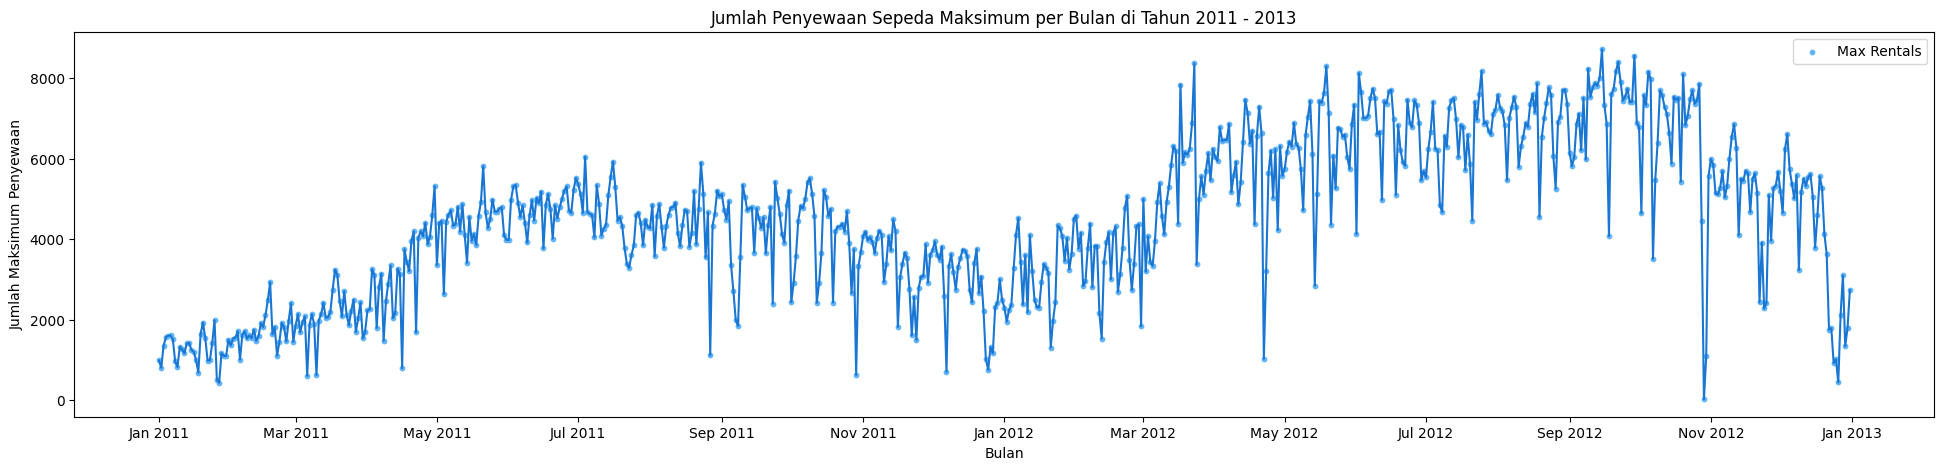

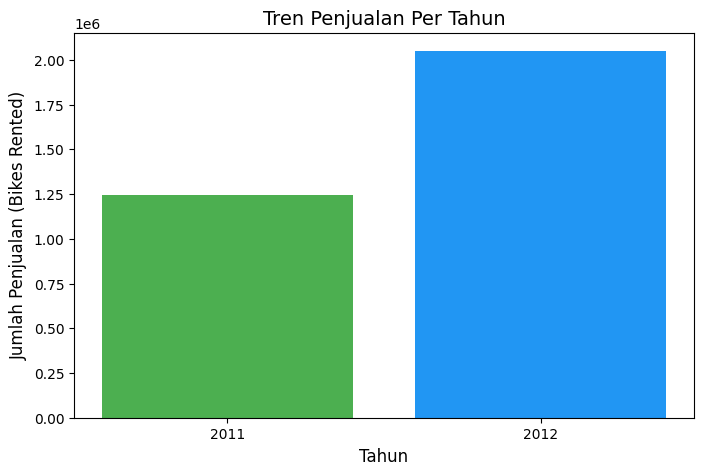

In [94]:
# membuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# menghitung jumlah maksimum penyewaan sepeda per bulan
max_monthly_rentals = day_df.groupby(day_df['dteday'])['count_cr'].max()

# membuat scatter plot untuk jumlah maksimum penyewaan per bulan dengan warna biru muda dan marker 'o'
plt.scatter(max_monthly_rentals.index, max_monthly_rentals.values, color="#64B5F6", s=10, marker='o', label='Max Rentals')

# membuat line plot untuk jumlah maksimum penyewaan per bulan
plt.plot(max_monthly_rentals.index, max_monthly_rentals.values, linestyle='-', color='#1976D2', linewidth=1.5)

# memberi label pada sumbu X
plt.xlabel('Bulan')

# mengatur interval untuk sumbu X agar menunjukkan label setiap 1-2 bulan
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# memberi label pada sumbu Y
plt.ylabel('Jumlah Maksimum Penyewaan')

# menambahkan judul
plt.title('Jumlah Penyewaan Sepeda Maksimum per Bulan di Tahun 2011 - 2013')

# menambahkan legenda untuk menjelaskan plot
plt.legend()

# menampilkan plot
plt.show()

sales_trend_data = day_df.groupby('year')['count_cr'].sum()

# menampilkan hasilnya
sales_trend = {'2011': sales_trend_data["2011"], '2012': sales_trend_data["2012"]}
years = list(sales_trend.keys())
sales = list(sales_trend.values())

plt.figure(figsize=(8, 5))
plt.bar(years, sales, color=['#4CAF50', '#2196F3'])

plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Penjualan (Bikes Rented)', fontsize=12)
plt.title('Tren Penjualan Per Tahun', fontsize=14)

plt.show()

### Pertanyaan 2: Di musim apa penyewaan sepeda paling tinggi terjadi?

<ipython-input-95-3924d3eb619c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_sales = day_df.groupby('season')['count_cr'].sum()


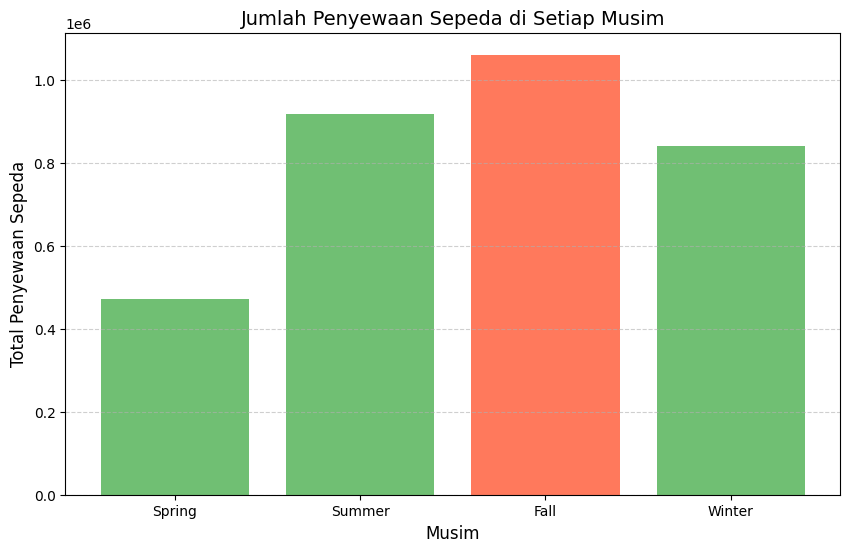

In [95]:
# menghitung jumlah penyewaan sepeda per musimnya
season_sales = day_df.groupby('season')['count_cr'].sum()

# membuat warna default untuk semua musim
colors = ['#4CAF50' if season != 'Fall' else '#FF5733' for season in season_sales.index]

# menyusun urutan musim agar lebih mudah dibaca
order_seasons = ['Spring', 'Summer', 'Fall', 'Winter']
season_sales = season_sales.reindex(order_seasons)

# membuat bar plot untuk menunjukkan jumlah penyewaan sepeda per musim
plt.figure(figsize=(10, 6))
plt.bar(season_sales.index, season_sales.values, color=colors, alpha=0.8)

# menambahkan label dan judul
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.title('Jumlah Penyewaan Sepeda di Setiap Musim', fontsize=14)

# menambahkan grid untuk membantu visualisasi
plt.grid(axis='y', linestyle='--', alpha=0.6)

# menampilkan plotnya
plt.show()

### Pertanyaan 3: Berapa banyak orang yang lebih memilih menjadi pelanggan terdaftar dibandingkan dengan pelanggan biasa?

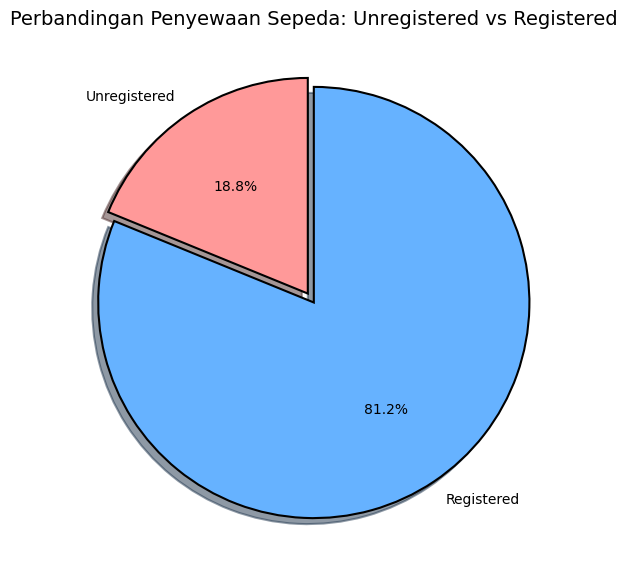

In [96]:
# menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Unregistered', 'Registered']

# warna yang lebih kontras
colors = ["#FF9999", "#66B2FF"]

# membuat pie plot dengan penyesuaian
plt.figure(figsize=(7, 7))
plt.pie(data, labels=labels, autopct='%1.1f%%', explode=(0.05, 0), colors=colors,
        shadow=True, startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# menampilkan pie plot
plt.title('Perbandingan Penyewaan Sepeda: Unregistered vs Registered', fontsize=14)
plt.show()


### Pertanyaan 4: Pada jam berapakah penyewaan sepeda mencapai puncaknya dan kapan yang paling sedikit?

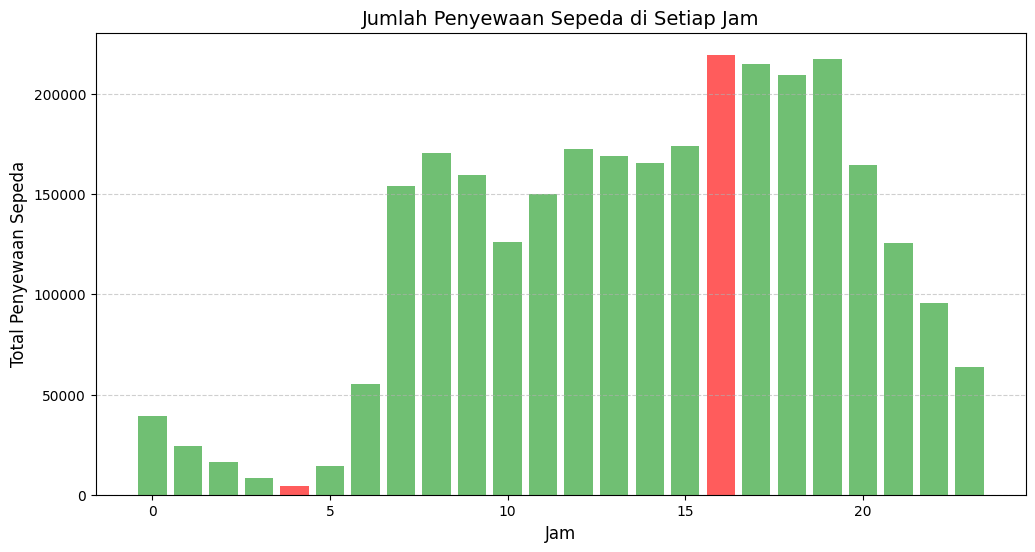

Penyewaan sepeda mencapai puncaknya pada jam 16:00.
Penyewaan sepeda paling sedikit terjadi pada jam 4:00.


In [97]:
# menghitung jumlah penyewaan sepeda per jam
hourly_rentals = hour_df.groupby('hours')['count_cr'].sum()

# menentukan jam dengan penyewaan tertinggi dan terendah
peak_hour = hourly_rentals.idxmax()
lowest_hour = hourly_rentals.idxmin()

# membuat daftar warna untuk setiap bar, default hijau
colors = ['#4CAF50' if hour != peak_hour and hour != lowest_hour else '#FF3333' for hour in hourly_rentals.index]

# membuat bar plot untuk menunjukkan jumlah penyewaan sepeda per jam
plt.figure(figsize=(12, 6))
plt.bar(hourly_rentals.index, hourly_rentals.values, color=colors, alpha=0.8)

# menambahkan label dan judul
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.title('Jumlah Penyewaan Sepeda di Setiap Jam', fontsize=14)

# menambahkan grid untuk membantu visualisasi
plt.grid(axis='y', linestyle='--', alpha=0.6)

# menampilkan plotnya
plt.show()

print(f"Penyewaan sepeda mencapai puncaknya pada jam {peak_hour}:00.")
print(f"Penyewaan sepeda paling sedikit terjadi pada jam {lowest_hour}:00.")


### Pertanyaan 5: Pada setiap tahunnya, di bulan apa penyewaan tertinggi terjadi?

<ipython-input-98-df4bed710ea0>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_2011 = data_2011.groupby('month')['count_cr'].sum()


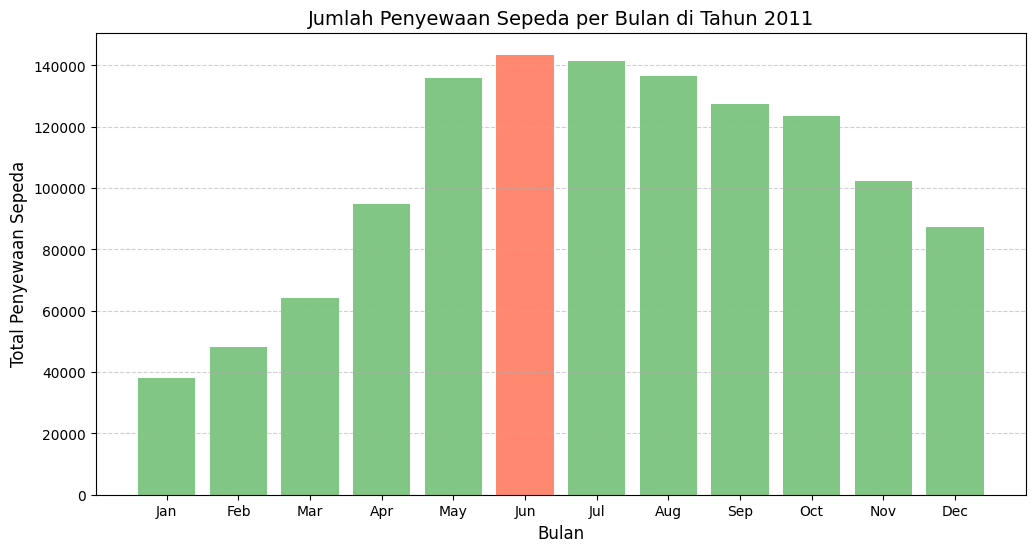

In [98]:
# membuat warna default untuk semua bulan
colors = ['#4CAF50' if month != 'Jun' else '#FF5733' for month in monthly_sales_2011.index]

# memfilter data untuk tahun 2011
data_2011 = day_df[day_df['year'] == '2011']

# menghitung jumlah penyewaan sepeda per bulan di tahun 2011
monthly_sales_2011 = data_2011.groupby('month')['count_cr'].sum()

# menyusun ulang urutan bulan agar lebih mudah dibaca
order_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales_2011 = monthly_sales_2011.reindex(order_months)

# membuat bar plot untuk melihat penjualan per bulan di tahun 2012
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales_2011.index, monthly_sales_2011.values, color=colors, alpha=0.7)

# menambahkan label dan judul
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.title('Jumlah Penyewaan Sepeda per Bulan di Tahun 2011', fontsize=14)

# menambahkan grid untuk membantu visualisasi
plt.grid(axis='y', linestyle='--', alpha=0.6)

# menampilkan plot
plt.show()

<ipython-input-99-02a183df869c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_2012 = data_2012.groupby('month')['count_cr'].sum()


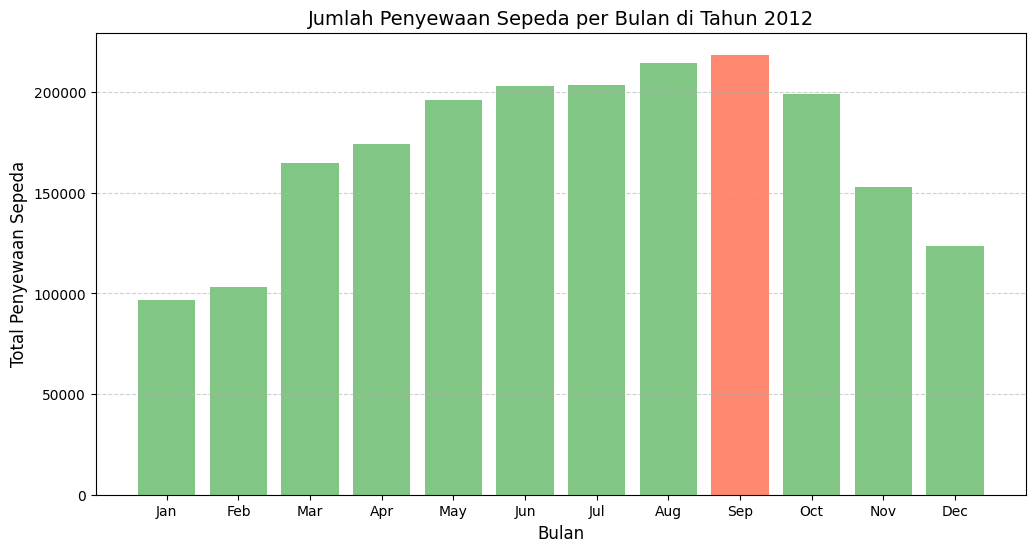

In [99]:
# membuat warna default untuk semua bulan
colors = ['#4CAF50' if month != 'Sep' else '#FF5733' for month in monthly_sales_2012.index]

# memfilter data untuk tahun 2012
data_2012 = day_df[day_df['year'] == '2012']

# menghitung jumlah penyewaan sepeda per bulan di tahun 2012
monthly_sales_2012 = data_2012.groupby('month')['count_cr'].sum()

# menyusun ulang urutan bulan agar lebih mudah dibaca
order_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales_2012 = monthly_sales_2012.reindex(order_months)

# membuat bar plot untuk melihat penjualan per bulan di tahun 2012
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales_2012.index, monthly_sales_2012.values, color=colors, alpha=0.7)

# menambahkan label dan judul
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.title('Jumlah Penyewaan Sepeda per Bulan di Tahun 2012', fontsize=14)

# menambahkan grid untuk membantu visualisasi
plt.grid(axis='y', linestyle='--', alpha=0.6)

# menampilkan plot
plt.show()

**Insight: **
---
Berikut merupakan hasil Explanatory Analysis:
- Pertanyaan 1: Berdasarkan visualisasi untuk pertanyaan 1, kita dapat melihat bahwa jumlah penyewaan sepeda terbanyak dalam rentang tahun 2011-2012 ini adalah pada tahun 2012 bulan September. Namun dapat dilihat juga bahwa terdapat penurunan yang cukup signifikan dari bulan Oktober ke bulan November dan Desember.
- Pertanyaan 2: Pada grafik bar untuk pertanyaan 2, dapat dilihat bahwa penyewaan sepeda terbanyak itu ada pada musim Fall. Untuk penyewaan sedikit adalah pada musim Spring.
- Pertanyaan 3: Di grafik pie chart untuk pertanyaan 3, bisa disimpulkan bahwa pelanggan yang sudah registrasi itu persentasenya lebih besar dibandingkan pelanggan yang belum registrasi dalam menyewa sepeda. Pelanggan yang sudah registered memiliki persentase sebesar 81.2%, sedangkan pelanggan casual sebanyak 18.8%.
- Pertanyaan 4: Berdasarkan grafik bar di pertanyaan 4, penyewaan sepeda mencapai puncaknya pada jam 17:00 (jam sibuk pulang kerja) dengan rata-rata penyewaan sebesar 372,55 unit per jam. Sebaliknya, penyewaan sepeda paling sedikit terjadi pada jam 04:00 dengan rata-rata hanya 6,35 unit per jam, menunjukkan bahwa aktivitas penyewaan sepeda sangat minim pada jam-jam dini hari.
- Pertanyaan 5: Pada grafik bar pertanyaan 1, tahun 2012 adalah tahun dengan total penyewaan sepeda terbanyak, yaitu 2.049.576 unit. Berdasarkan grafik pertanyaan 5, dapat disimpulkan juga bahwa
bulan dengan penyewaan tertinggi adalah September, dengan total penyewaan mencapai 218.573 unit, menjadikannya bulan paling sibuk sepanjang tahun.

## Analisis Lanjutan (Opsional)

### RFM Analysis (Recency, Frequency, Monetary)

Disini saya melakukan analisis RFM (Recency, Frequency, Monetary) untuk pelanggan terdaftar (registered). Tujuannya adalah untuk mengelompokkan pelanggan berdasarkan perilaku pembelian mereka guna mengidentifikasi pelanggan yang bernilai tinggi dan mendukung strategi pemasaran yang lebih terarah. Pertama, kolom dteday digunakan untuk menghitung "Recency," yaitu jumlah hari sejak transaksi terakhir setiap pelanggan. Kolom instant digunakan untuk menghitung "Frequency," yaitu jumlah transaksi unik per pelanggan, dan count_cr menghitung "Monetary," yaitu total penyewaan sepeda oleh setiap pelanggan. Hasilnya disajikan dalam bentuk tabel yang menggambarkan perilaku pelanggan berdasarkan tiga faktor tersebut.

In [100]:
# menentukan tanggal terakhir di dataset
latest_date = hour_df['dteday'].max()

# menghitung RFM metrics untuk setiap pelanggan terdaftar (registered)
rfm_metrics = hour_df.groupby('registered').agg({
    'dteday': lambda date: (latest_date - date.max()).days,  # recency: menghitung jumlah hari sejak pembelian terakhir
    'instant': 'nunique',  # frequency: menghitung frekuensi unik transaksi per pelanggan
    'count_cr': 'sum'  # monetary: menghitung total jumlah penyewaan
}).reset_index()

# memberikan nama yang lebih jelas pada kolom
rfm_metrics.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# menampilkan hasil RFM analysis untuk melihat sekilas
print(rfm_metrics.head())


   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


### Clustering Analysis

Tujuan dari clustering ini adalah untuk mengelompokkan data ke dalam grup berdasarkan karakteristik tertentu guna menemukan pola atau kelompok yang mungkin tersembunyi. Untuk manual grouping, saya mengelompokkan data penyewaan berdasarkan jenis hari (weekdays, weekend, holiday) untuk melihat pola perilaku. Untuk binning, saya mengelompokkan berdasarkan rentang jamnya (morning, afternoon, evening, night).

In [101]:
# manual grouping: mengelompokkan berdasarkan kategori hari
grouped_by_day_category = day_df.groupby('weekday')['count_cr'].sum().reset_index(name='total_rentals')
print(grouped_by_day_category)

# binning: mengelompokkan berdasarkan rentang jam (morning, afternoon, evening, night)
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

hour_df['time_of_day'] = hour_df['hours'].apply(time_of_day)

# mengelompokkan jumlah penyewaan berdasarkan waktu dalam sehari
grouped_by_time_of_day = hour_df.groupby('time_of_day')['count_cr'].sum().reset_index(name='total_rentals')
print(grouped_by_time_of_day)


     weekday  total_rentals
0     Sunday         444027
1     Monday         455503
2    Tuesday         469109
3  Wednesday         473048
4   Thursday         485395
5     Friday         487790
6   Saturday         477807
  time_of_day  total_rentals
0   Afternoon        1115839
1     Evening         876240
2     Morning         815723
3       Night         106509


<ipython-input-101-d9317a0696e3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_day_category = day_df.groupby('weekday')['count_cr'].sum().reset_index(name='total_rentals')


## Conclusion

---
- Conclusion Pertanyaan 1, Tren Penjualan Sepeda Selama Beberapa Tahun:
-- Penjualan sepeda mengalami peningkatan signifikan dari tahun 2011 ke 2012.
-- Pada tahun 2011, total sepeda yang disewa mencapai 1.243.103 unit.
-- Pada tahun 2012, terjadi peningkatan hingga 2.049.576 unit, menunjukkan pertumbuhan bisnis yang kuat.
---
- Conclusion Pertanyaan 2, Musim dengan Penyewaan Sepeda Tertinggi:
-- Musim Fall (Musim Gugur) mencatat jumlah penyewaan sepeda tertinggi dibandingkan musim lainnya.
-- Total penyewaan pada musim Fall mencapai 1.061.129 unit, menyoroti musim ini sebagai periode paling sibuk untuk penyewaan sepeda.
---
- Conclusion Pertanyaan 3, Perbandingan Antara Pelanggan Terdaftar dan Pelanggan Biasa:
-- Sebagian besar penyewa sepeda lebih memilih untuk menjadi pelanggan terdaftar dibandingkan pelanggan biasa.
-- Jumlah penyewa terdaftar mencapai 2.672.662 orang, sedangkan pelanggan biasa hanya sebesar 620.017 orang.
-- Ini menunjukkan preferensi yang kuat terhadap model berlangganan di antara pelanggan.
---
- Conclusion Pertanyaan 4, Jam dengan Penyewaan Sepeda Tertinggi dan Terendah:
-- Penyewaan sepeda mencapai puncaknya pada jam 17:00 (jam sibuk pulang kerja) dengan rata-rata penyewaan sebesar 372,55 unit per jam.
-- Sebaliknya, penyewaan sepeda paling sedikit terjadi pada jam 04:00 dengan rata-rata hanya 6,35 unit per jam, menunjukkan bahwa aktivitas penyewaan sepeda sangat minim pada jam-jam dini hari.
---
- Conclusion Pertanyaan 5, Penyewaan Sepeda Tertinggi tiap Tahun Jatuh pada Bulan:
-- Di tahun 2011, penyewaan tertinggi terjadi di bulan Juni, dengan total penyewaan mencapai 143.512 unit.
-- Tahun 2012 adalah tahun dengan total penyewaan sepeda terbanyak, yaitu 2.049.576 unit. Penyewaan tertinggi terjadi di bulan September, dengan total penyewaan mencapai 218.573 unit, menjadikannya bulan paling sibuk sepanjang tahun.
---